Кластерный анализ (Data clustering) — это задача разбиения заданной выборки объектов (ситуаций) на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

In [1]:
#Подключение библиотек
import matplotlib.pyplot as plt #для гистограмм, диаграмм
import numpy as np  #для обработки массивов
import pandas as pd #для анализа данных
import matplotlib.style as stl #для гистограмм, диаграмм
import seaborn as sns #библиотека визуализации данных

In [2]:
raw_df = pd.read_csv('data.csv')
data = raw_df.copy() #копируем файл

In [3]:
data.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.describe() #статистические характеристики

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
data.isnull().sum() #сумма пропущенных значений

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
import datetime as dt #для преобразования столбца

data["date"]=pd.to_datetime(data["date"])
data['Date_year'] =data["date"].dt.year
data['Date_month'] = data["date"].dt.month
data['Date_day'] = data["date"].dt.day
data['Date_hour'] =data["date"].dt.hour
data['Date_minute'] = data["date"].dt.minute
data['Date_seconde'] = data["date"].dt.second

In [8]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,0,0,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,0,0,0
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,0,0,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,0,0,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,0,0,0


In [9]:
dataa=data.copy()

In [10]:
data.drop(["date"], axis=1, inplace=True)

In [11]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_minute',
       'Date_seconde'],
      dtype='object')

In [12]:
data.drop(["street"], axis=1, inplace=True)

In [13]:
data.drop(["statezip"], axis=1, inplace=True)

In [14]:
stl.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
stl.use('ggplot')

C:\Users\Nata\AppData\Local\Temp/ipykernel_15988/514360887.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


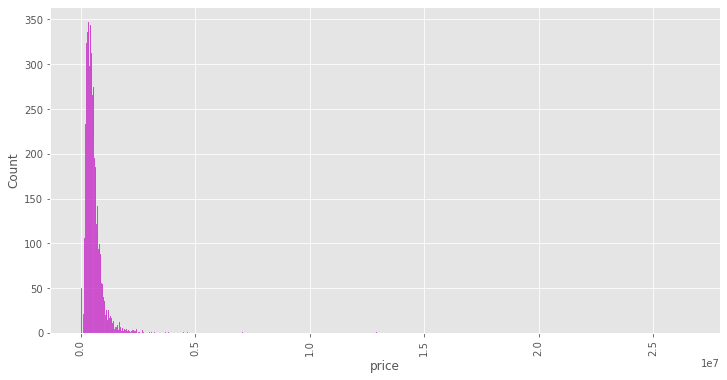

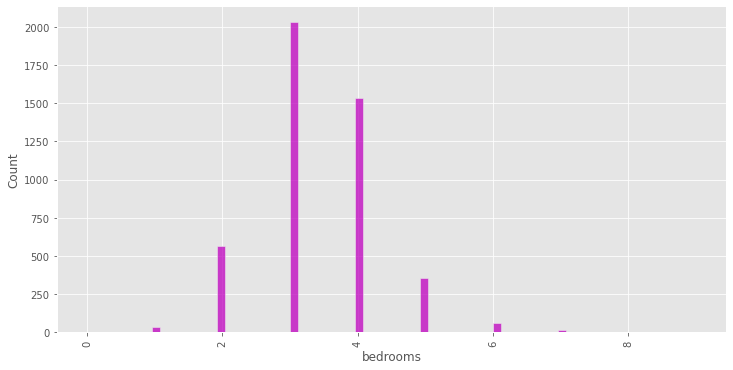

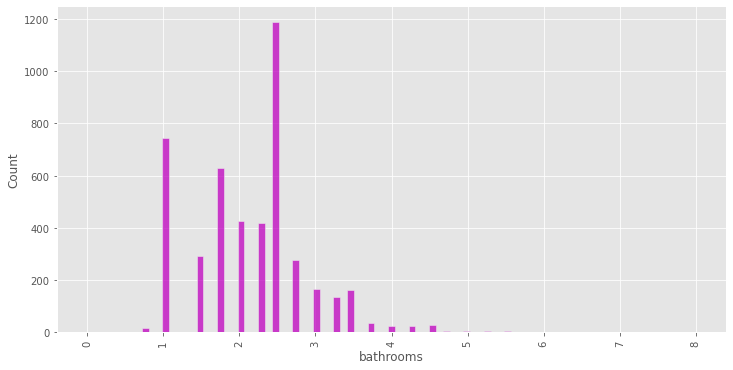

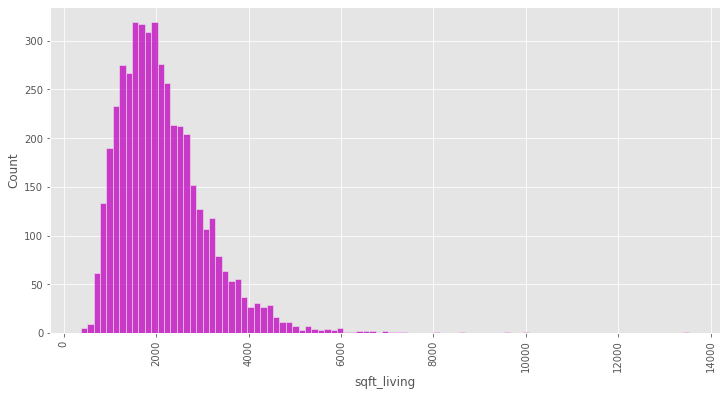

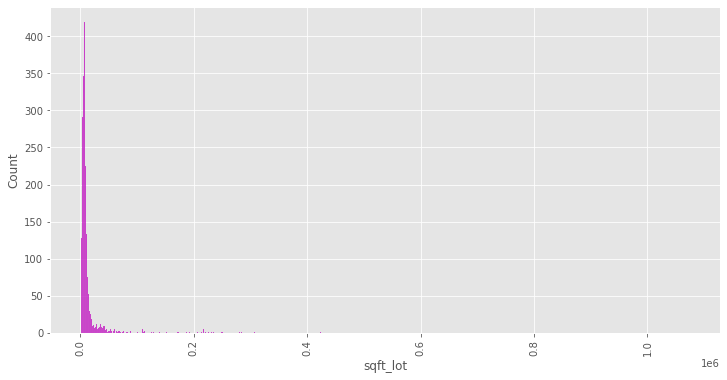

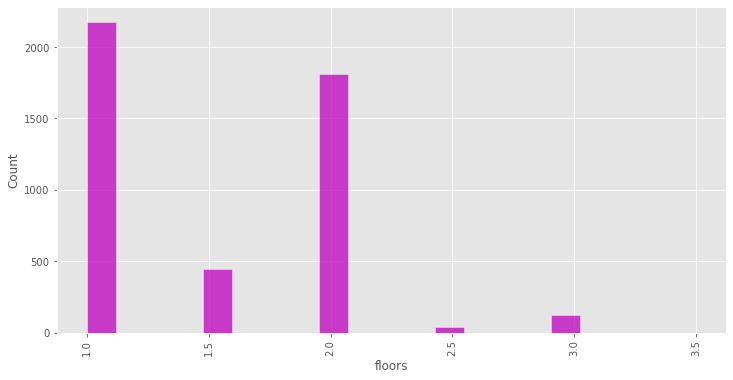

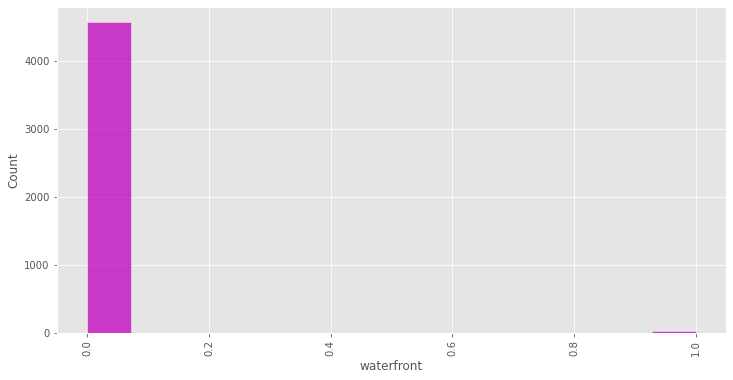

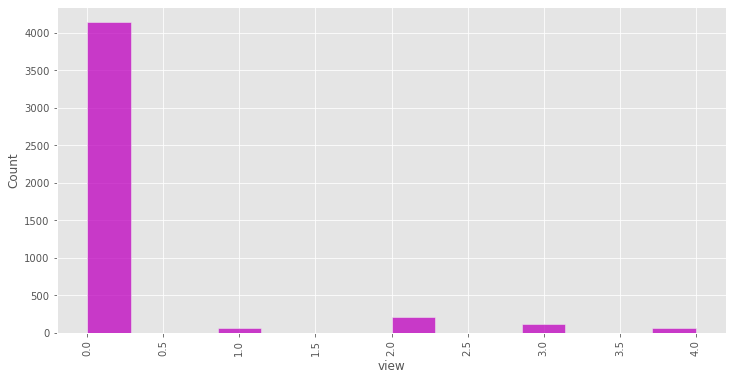

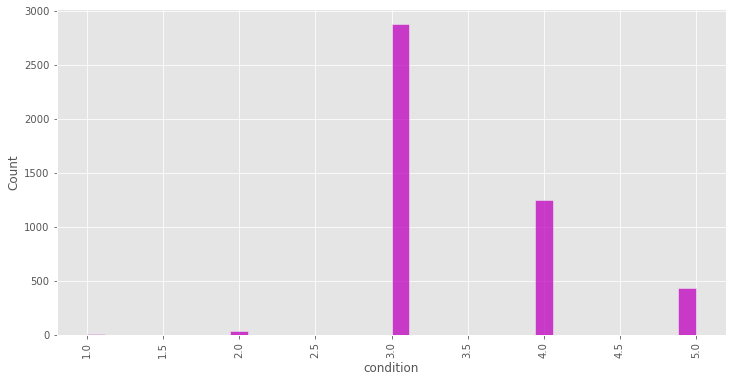

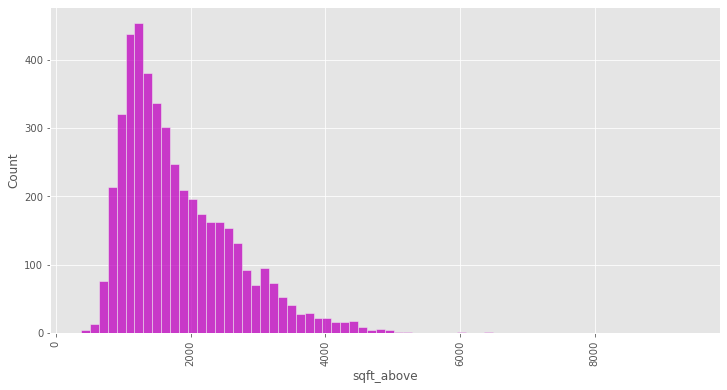

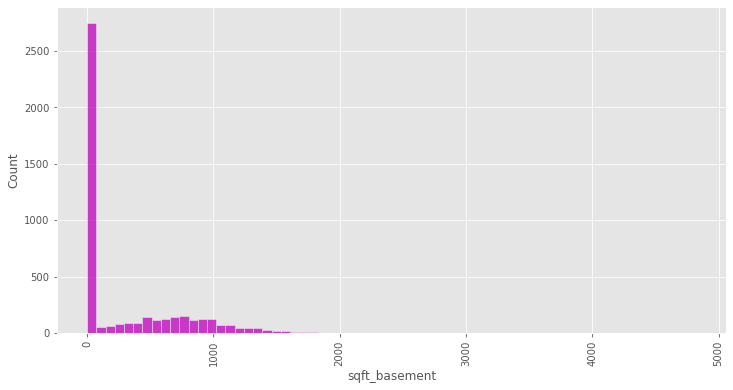

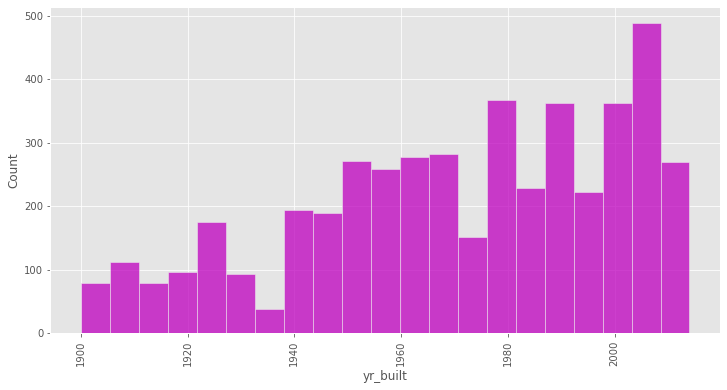

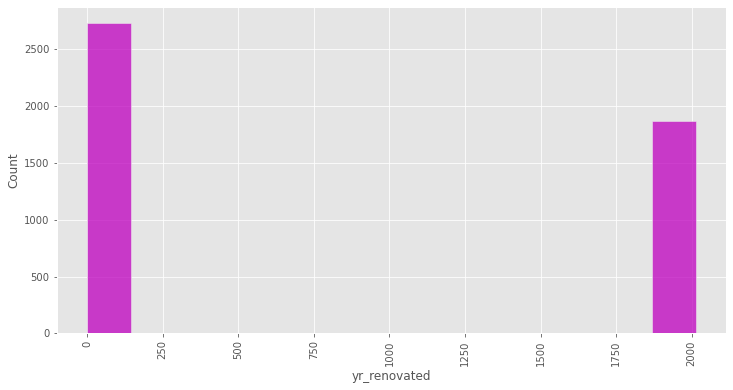

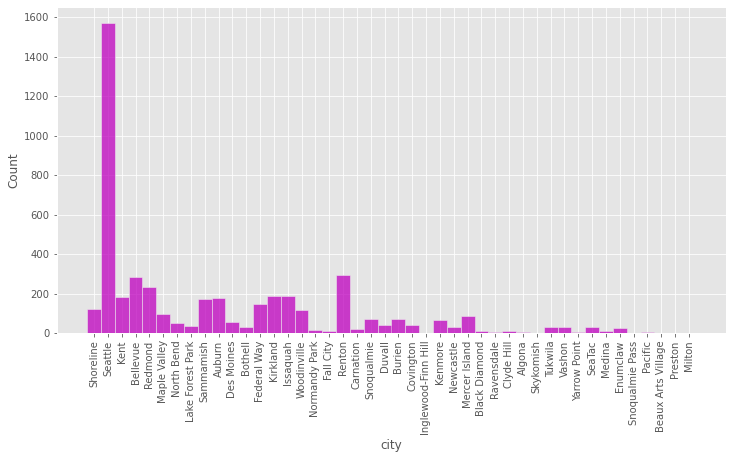

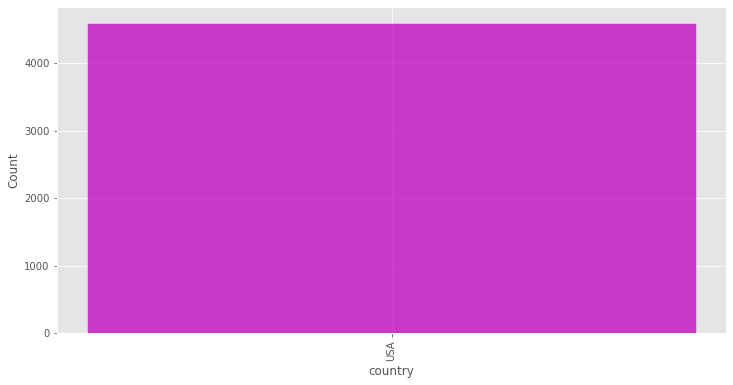

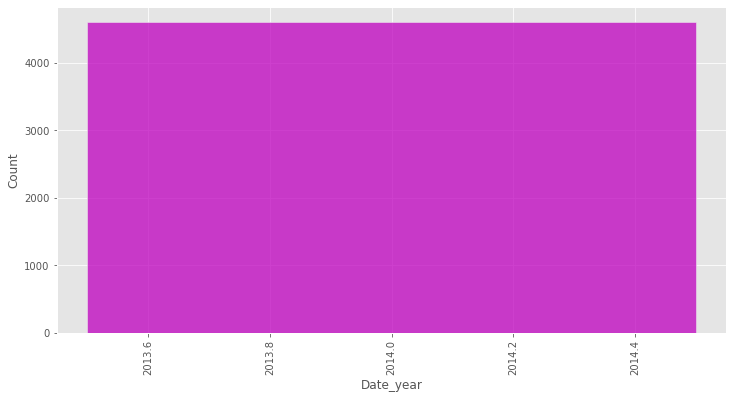

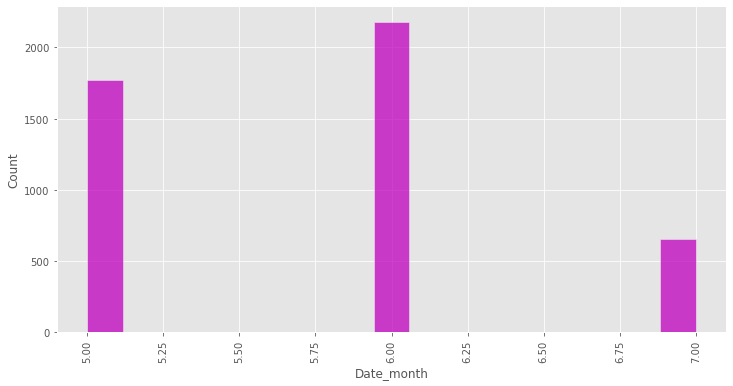

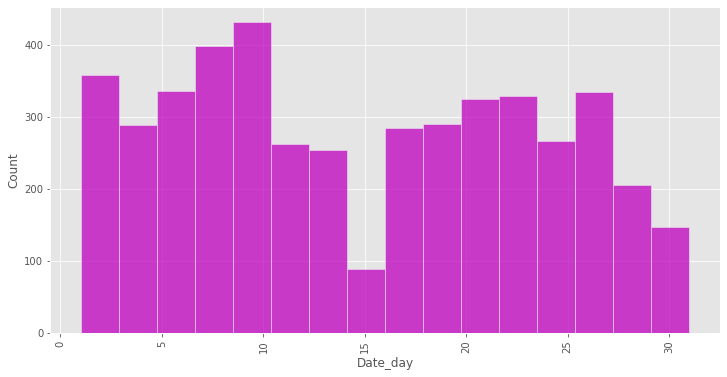

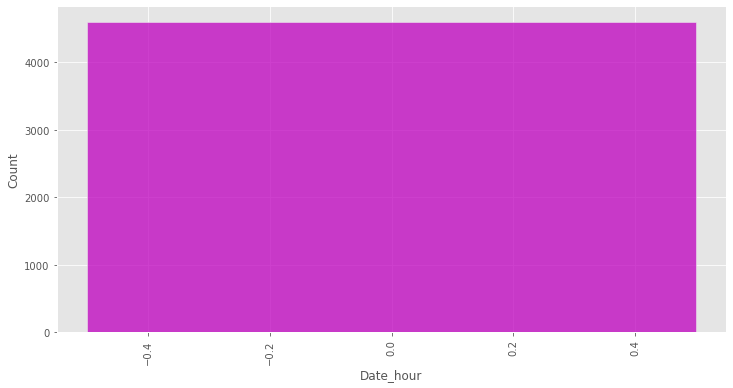

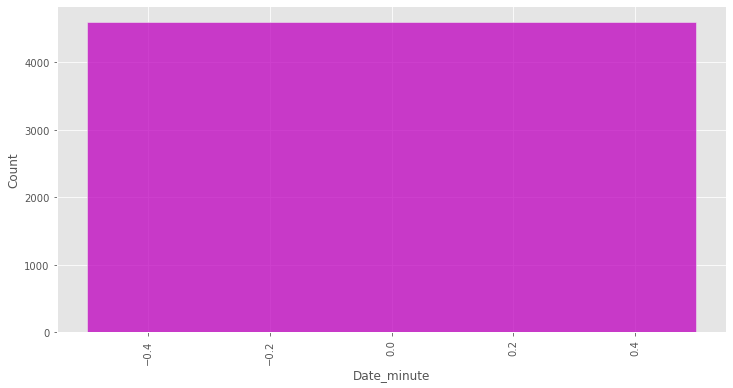

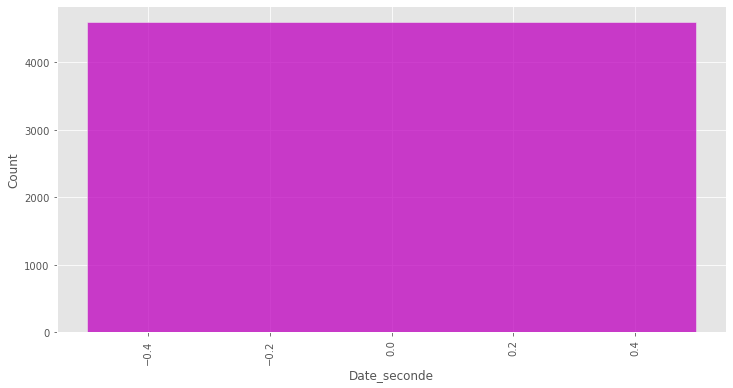

In [16]:
for col in data.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.xticks(rotation=90)
    plt.show

In [17]:
data.info() #справка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  country        4600 non-null   object 
 15  Date_year      4600 non-null   int64  
 16  Date_month     4600 non-null   int64  
 17  Date_day       4600 non-null   int64  
 18  Date_hou

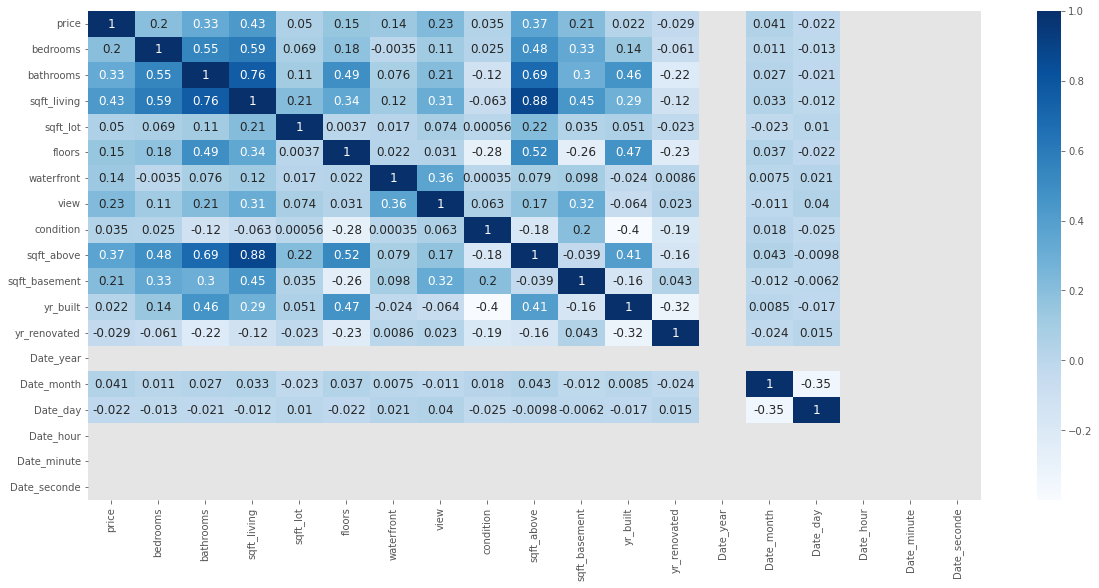

In [18]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.show()

Уменьшение размерности

In [19]:
data=data.drop(["city","country"], axis=1)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

Кластер KMeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

In [23]:
cluster_labels

array([0, 3, 0, ..., 0, 0, 0])

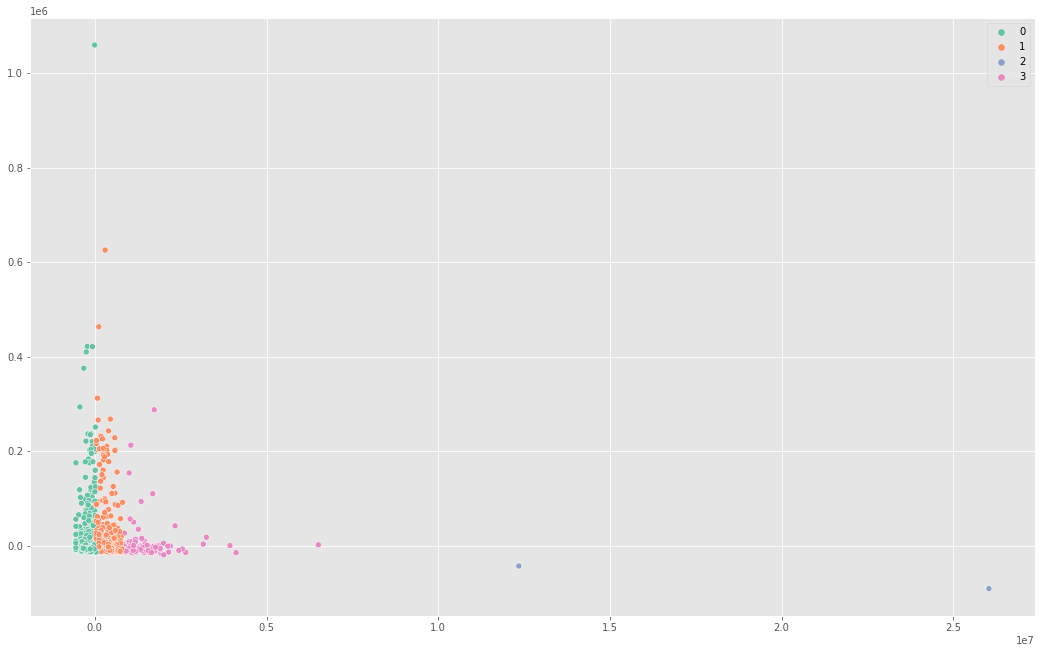

In [24]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set2")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

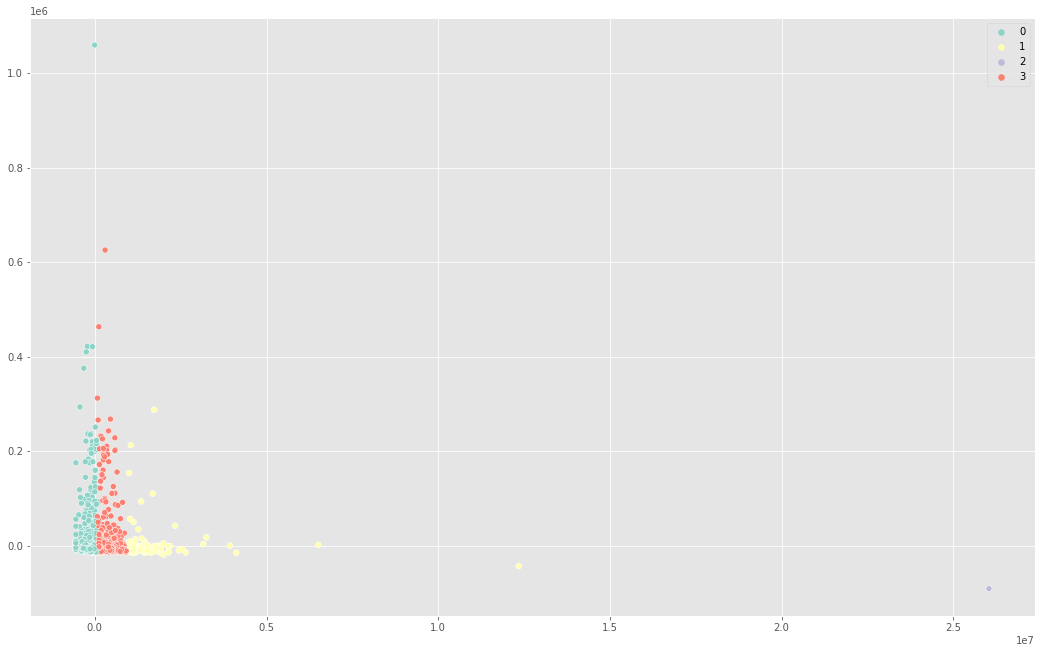

In [26]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set3")
plt.show()